In [45]:
import numpy as np
import pandas as pd
import cv2
import tifffile as tiff
import tarfile
import os
import matplotlib.pyplot as plt
from skimage import color

In [46]:
faces_train = {}
with tarfile.open("/content/train.tar", "r") as facetar:
    for eachfile in facetar.getnames():
        if not eachfile.endswith(".tif"):
            continue 
        with facetar.extractfile(eachfile) as img:
            buffer = np.frombuffer(img.read(), np.uint8)
            faces_train[eachfile] = cv2.imdecode(buffer, cv2.IMREAD_GRAYSCALE)

In [47]:
faces_test = {}
with tarfile.open("/content/test.tar", "r") as facetar:
    for eachfile in facetar.getnames():
        if not eachfile.endswith(".tif"):
            continue 
        with facetar.extractfile(eachfile) as img:
            buffer = np.frombuffer(img.read(), np.uint8)
            faces_test[eachfile] = cv2.imdecode(buffer, cv2.IMREAD_GRAYSCALE)

In [48]:
images = list(faces_train.values())
images[1].shape

(112, 92)

In [49]:
images_test = list(faces_test.values())
images_test[1].shape

(112, 92)

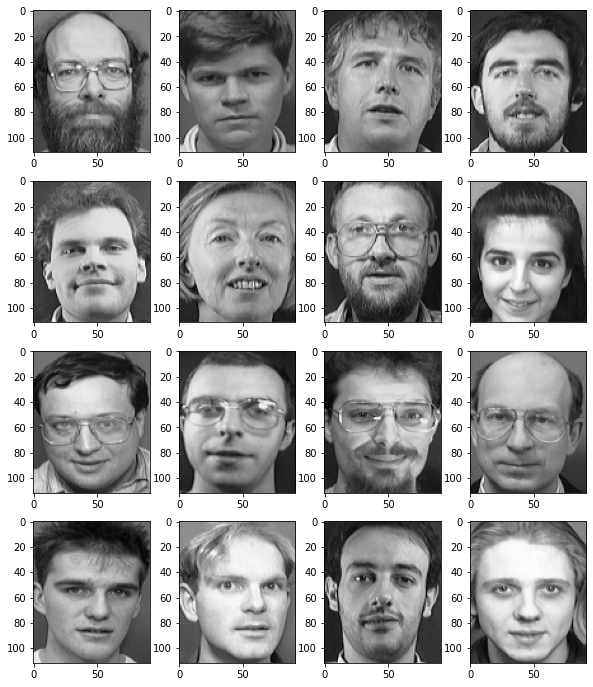

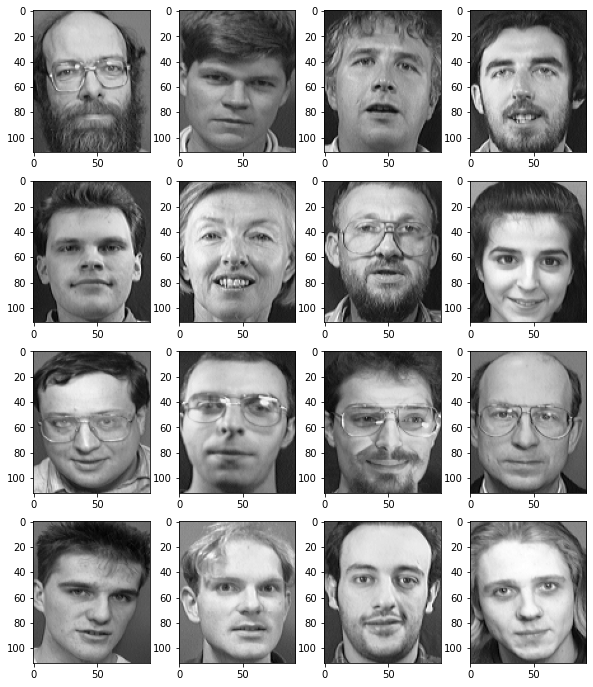

In [50]:
figure, ax = plt.subplots(4,4,figsize=(10,12))
train_faces = list(faces_train.values())[24:] 
for l in range(16):
    x = l%4
    y = l//4
    ax[x][y].imshow(train_faces[l], cmap="gray")
plt.show()

figure, ax = plt.subplots(4,4,figsize=(10,12))
test_faces = list(faces_test.values())[24:] 
for l in range(16):
    x = l%4
    y = l//4
    ax[x][y].imshow(test_faces[l], cmap="gray")
plt.show()

In [51]:
from sklearn.decomposition import PCA
face_shape = list(faces_train.values())[1].shape
print("shape of the faces:", face_shape)
 
categories= set(eachfile.split("/")[0] for eachfile in faces_train.keys())
print("Number of categories:", len(categories))
print("images count:", len(faces_train))

shape of the faces: (112, 92)
Number of categories: 1
images count: 40


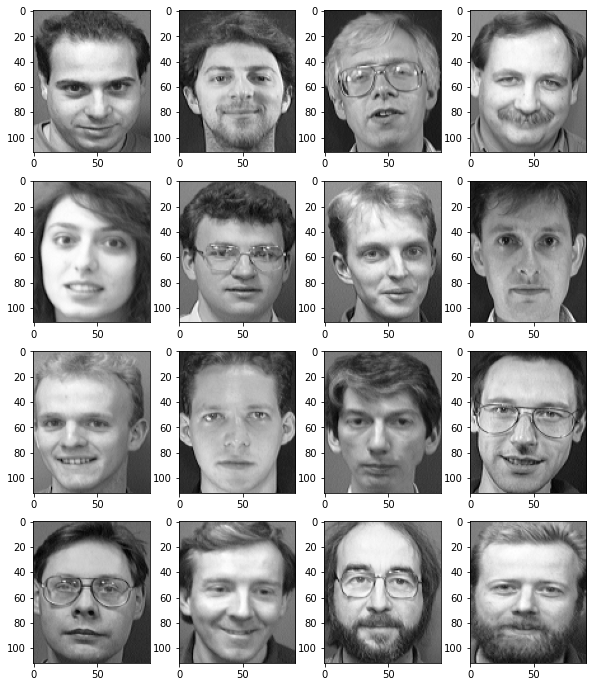

Showing the eigenfaces


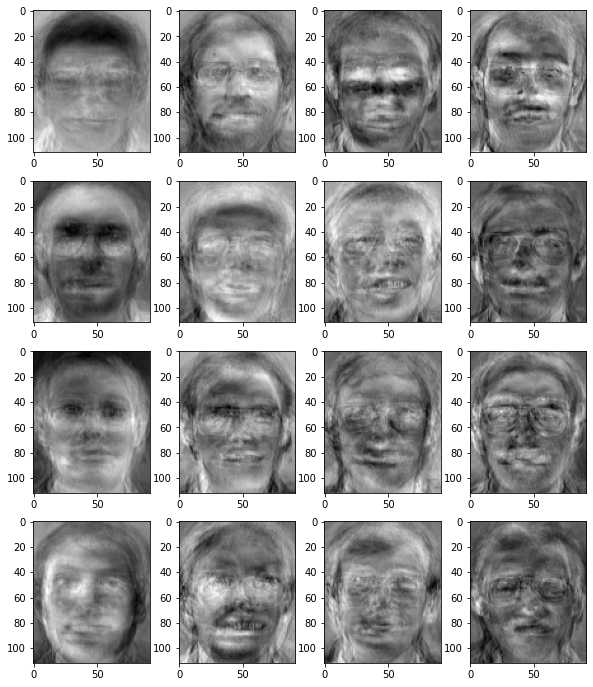

In [52]:
flatten_face_matrix = []
label = []
for key,value in faces_train.items():
    flatten_face_matrix.append(value.flatten())
    label.append(key.split("/")[0])
 
flatten_face_matrix = np.array(flatten_face_matrix)
transformation = PCA().fit(flatten_face_matrix)
eigen_faces = transformation.components_[:45]
 
figure, ax = plt.subplots(4,4,figsize=(10,12))
faces = list(faces_train.values())[:20] 
for l in range(16):
    x = l%4
    y = l//4
    ax[x][y].imshow(faces[l], cmap="gray")
plt.show()

figure, ax = plt.subplots(4,4,figsize=(10,12))
for l in range(16):
    x = l%4
    y = l//4
    display = eigen_faces[l].reshape(face_shape)
    ax[x][y].imshow(display, cmap="gray")
print("Showing the eigenfaces")
plt.show()

In [53]:
params = np.dot(eigen_faces, (flatten_face_matrix - transformation.mean_).T)
print("Shape of the weight matrix:", params.shape)

Shape of the weight matrix: (40, 40)


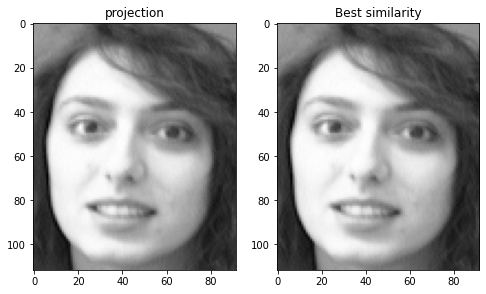

In [54]:
projection = images[1].reshape(1,-1)
projection_param = np.dot(eigen_faces, (projection - transformation.mean_).T)
dist = np.linalg.norm(params - projection_param, axis=0)
best = np.argmin(dist)
fig, axes = plt.subplots(1,2,figsize=(8,6))
axes[0].imshow(projection.reshape(face_shape), cmap="gray")
axes[0].set_title("projection")
axes[1].imshow(flatten_face_matrix[best].reshape(face_shape), cmap="gray")
axes[1].set_title("Best similarity")
plt.show()


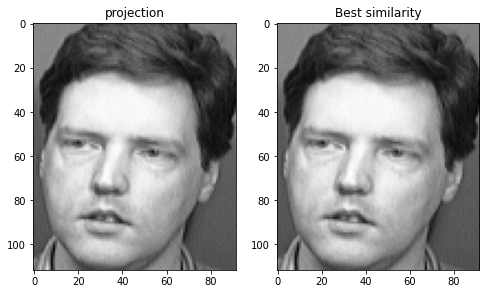

In [55]:
projection = images[21].reshape(1,-1)
projection_param = np.dot(eigen_faces, (projection - transformation.mean_).T)
dist = np.linalg.norm(params - projection_param, axis=0)
best = np.argmin(dist)
fig, axes = plt.subplots(1,2,figsize=(8,6))
axes[0].imshow(projection.reshape(face_shape), cmap="gray")
axes[0].set_title("projection")
axes[1].imshow(flatten_face_matrix[best].reshape(face_shape), cmap="gray")
axes[1].set_title("Best similarity")
plt.show()

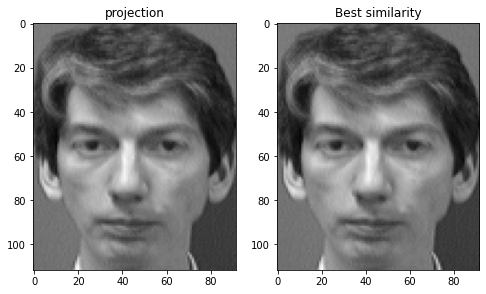

In [56]:
projection = images[10].reshape(1,-1)
projection_param = np.dot(eigen_faces, (projection - transformation.mean_).T)
dist = np.linalg.norm(params - projection_param, axis=0)
best = np.argmin(dist)
fig, axes = plt.subplots(1,2,figsize=(8,6))
axes[0].imshow(projection.reshape(face_shape), cmap="gray")
axes[0].set_title("projection")
axes[1].imshow(flatten_face_matrix[best].reshape(face_shape), cmap="gray")
axes[1].set_title("Best similarity")
plt.show()

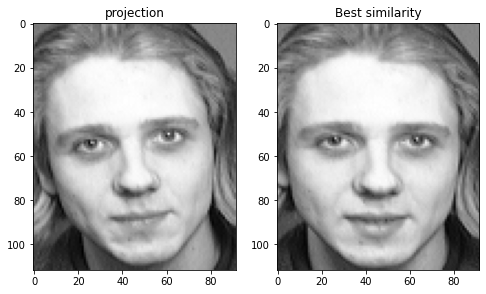

In [57]:
projection = images_test[39].reshape(1,-1)
projection_param = np.dot(eigen_faces, (projection - transformation.mean_).T)
dist = np.linalg.norm(params - projection_param, axis=0)
best = np.argmin(dist)
fig, axes = plt.subplots(1,2,figsize=(8,6))
axes[0].imshow(projection.reshape(face_shape), cmap="gray")
axes[0].set_title("projection")
axes[1].imshow(flatten_face_matrix[best].reshape(face_shape), cmap="gray")
axes[1].set_title("Best similarity")
plt.show()

0


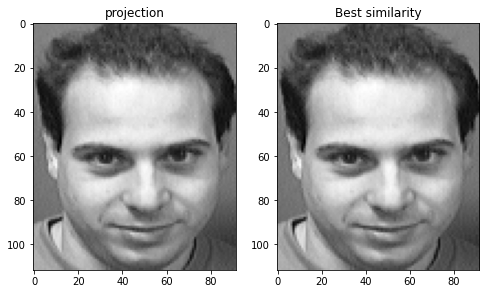

1


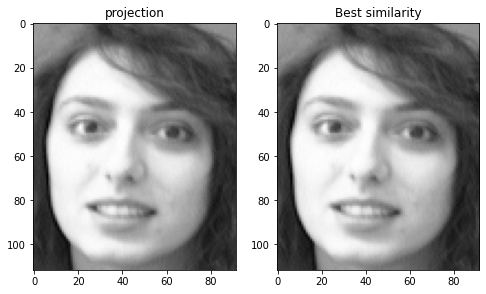

2


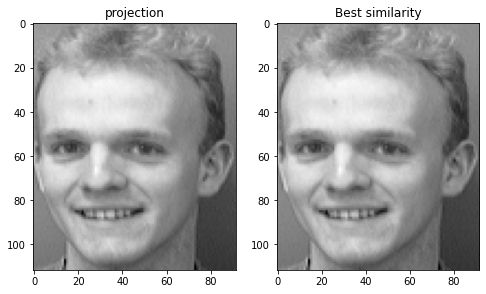

3


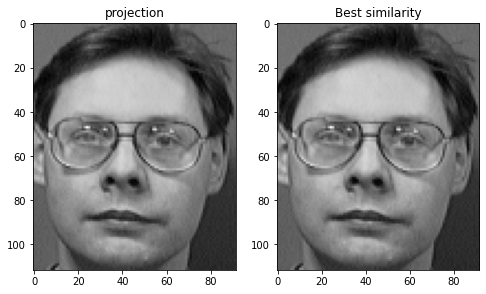

4


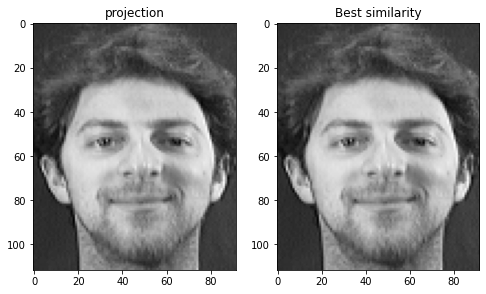

5


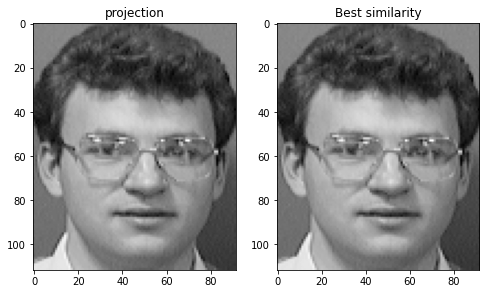

6


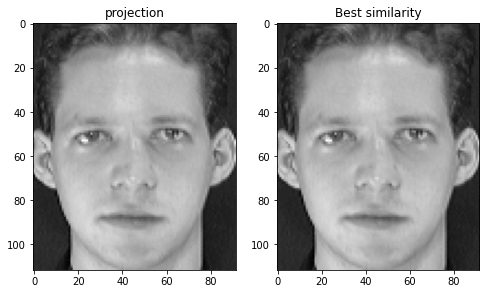

7


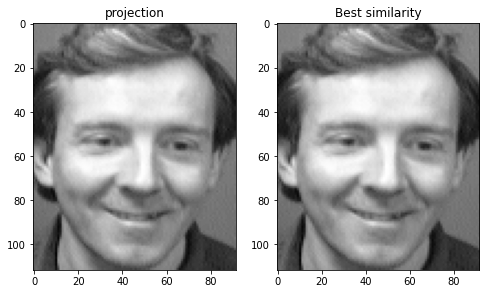

8


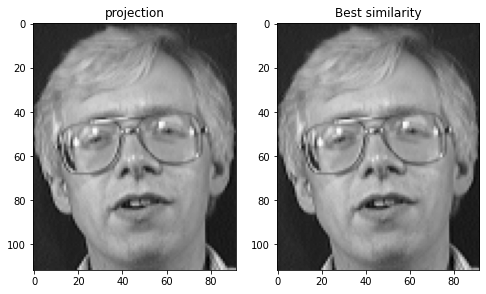

9


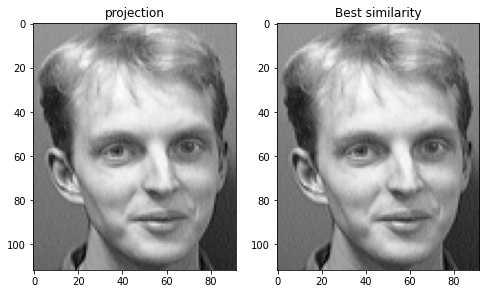

10


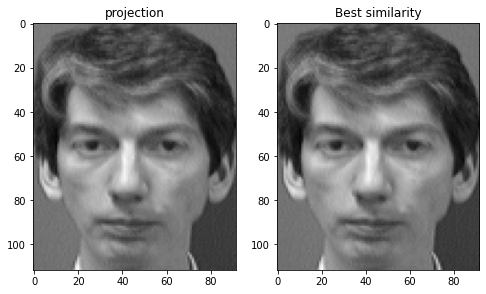

11


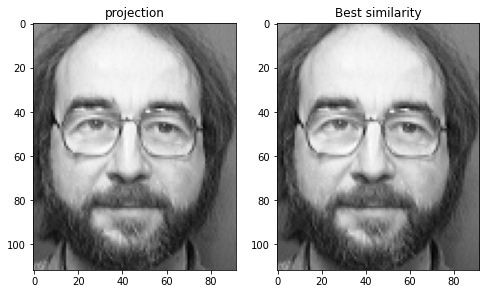

12


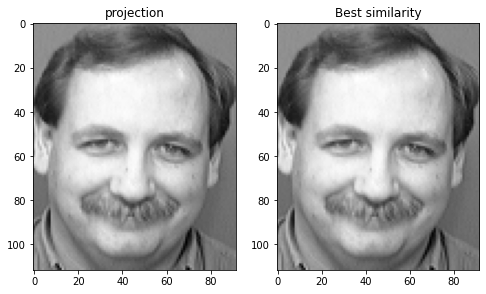

13


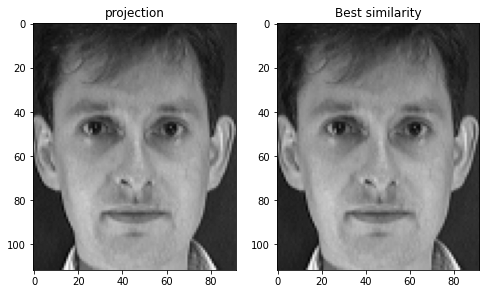

14


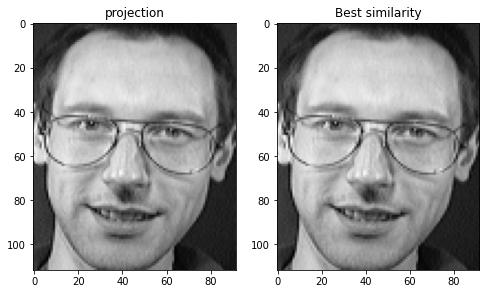

15


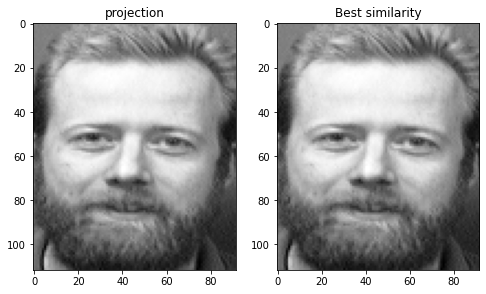

16


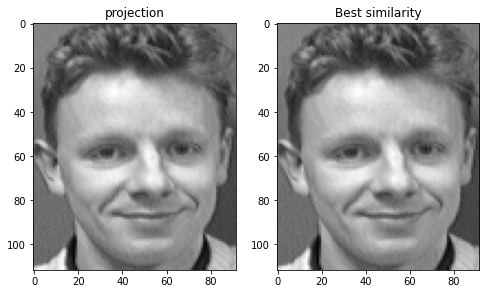

17


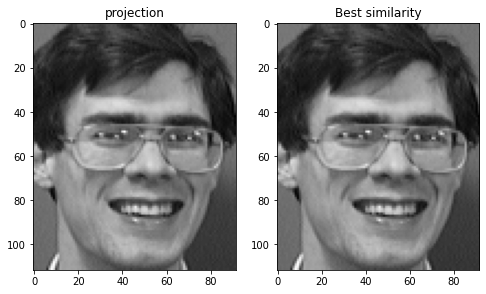

18


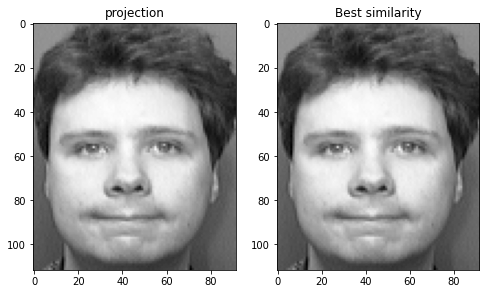

19


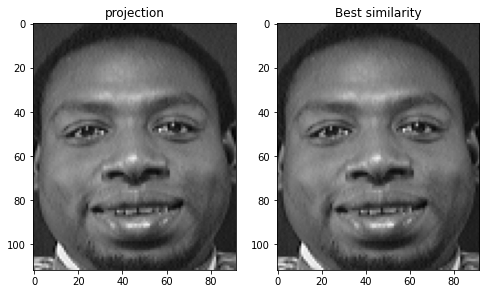

20


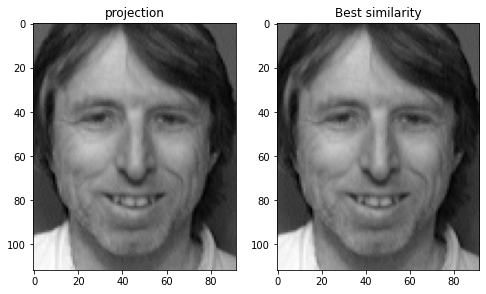

21


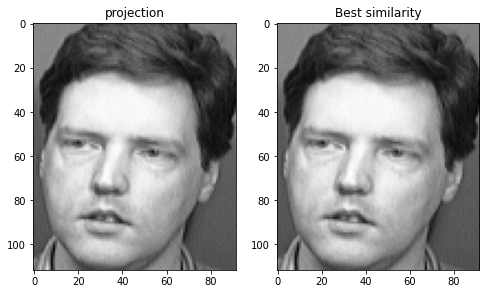

22


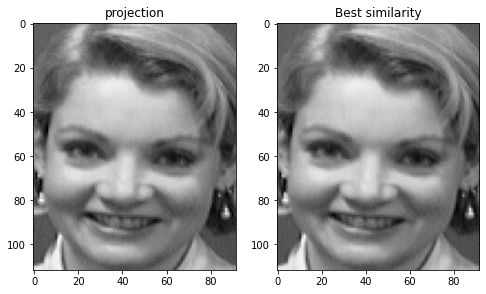

23


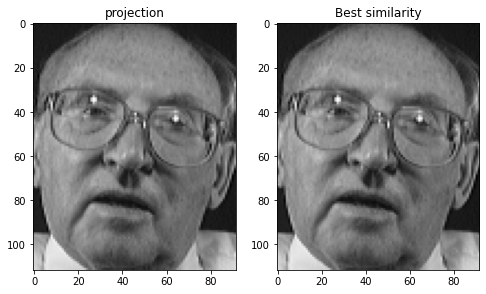

24


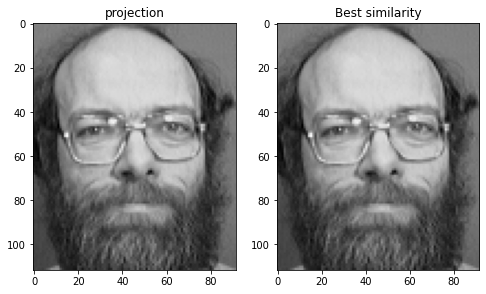

25


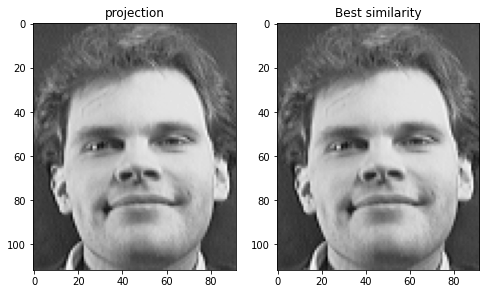

26


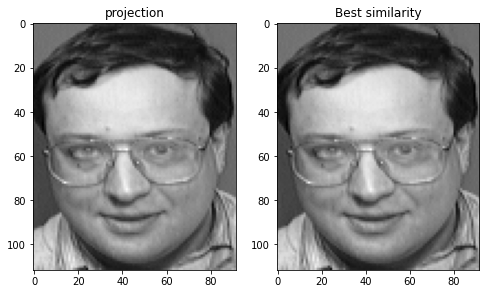

27


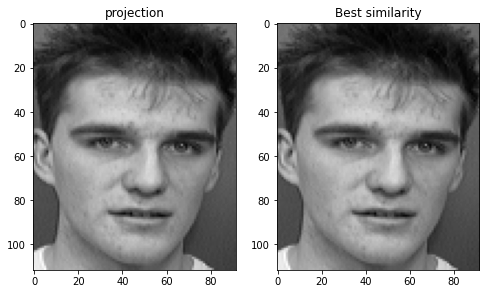

28


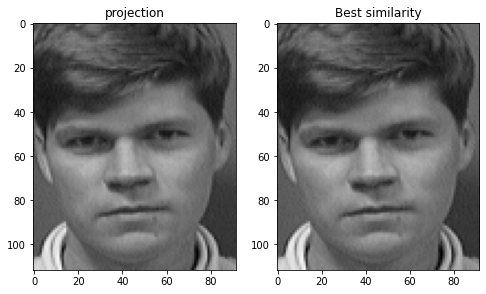

29


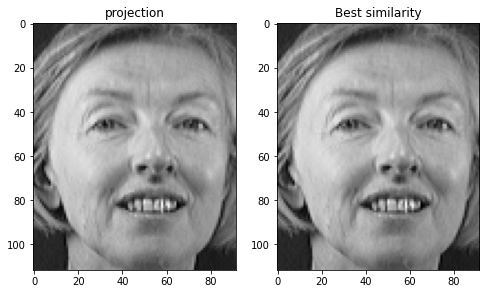

30


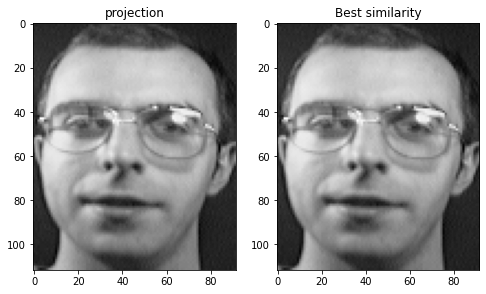

31


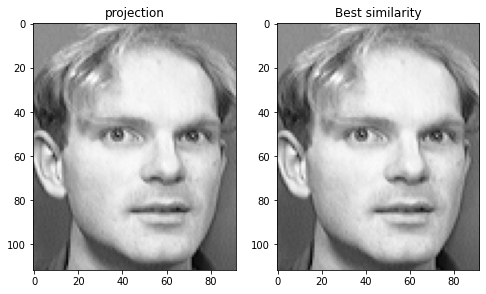

32


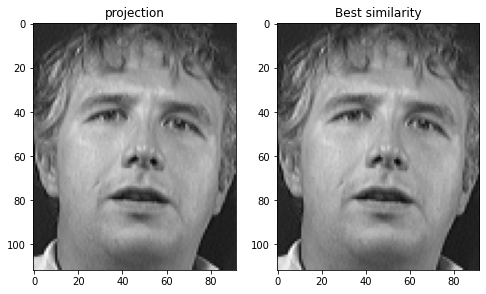

33


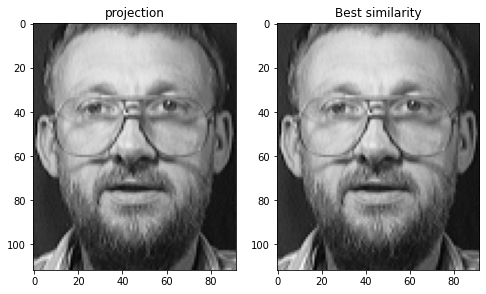

34


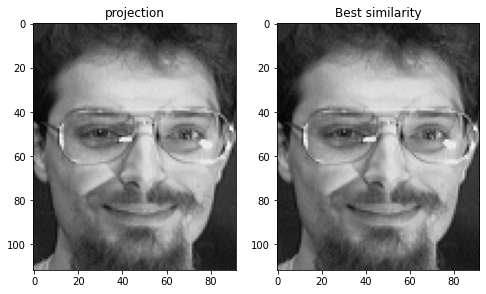

35


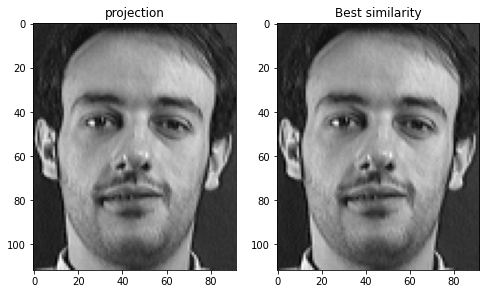

36


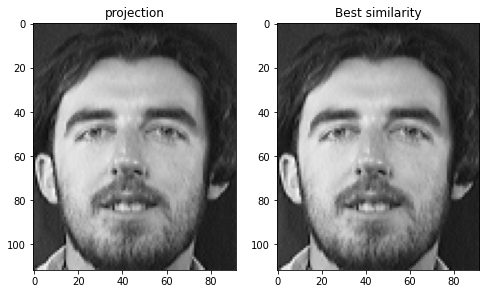

37


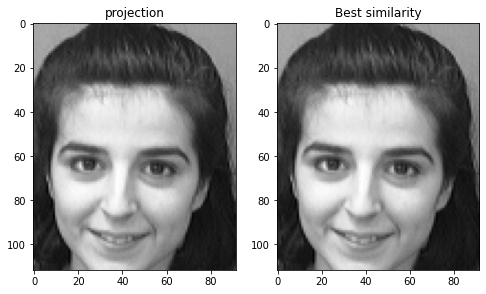

38


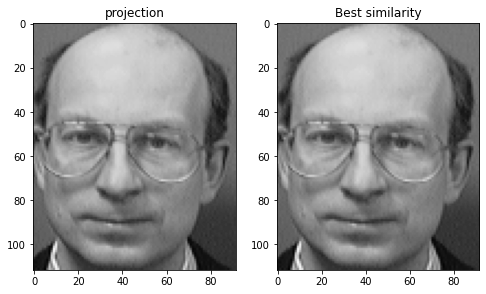

39


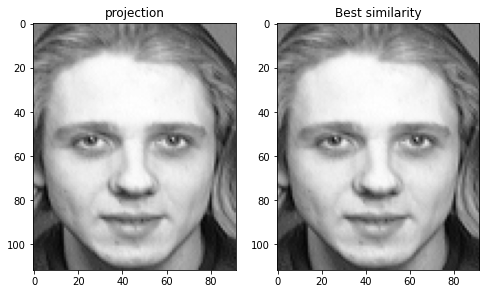

In [58]:
count = 0
for i in range(40): 
 projection = images[i].reshape(1,-1)
 projection_param = np.dot(eigen_faces, (projection - transformation.mean_).T)
 dist = np.linalg.norm(params - projection_param, axis=0)
 best = np.argmin(dist)
 print(best)
 if(best == i):
   count += 1
 fig, axes = plt.subplots(1,2,figsize=(8,6))
 axes[0].imshow(projection.reshape(face_shape), cmap="gray")
 axes[0].set_title("projection")
 axes[1].imshow(flatten_face_matrix[best].reshape(face_shape), cmap="gray")
 axes[1].set_title("Best similarity")
 plt.show() 

In [59]:
accuracy = (count/40)*100
accuracy

100.0

0


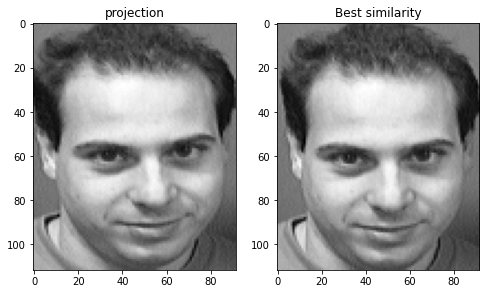

1


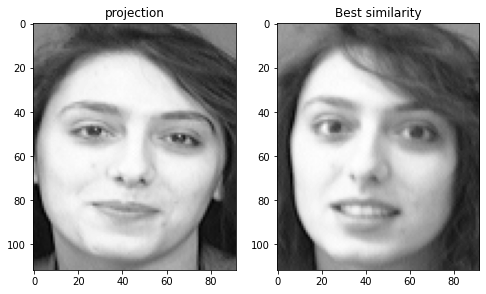

2


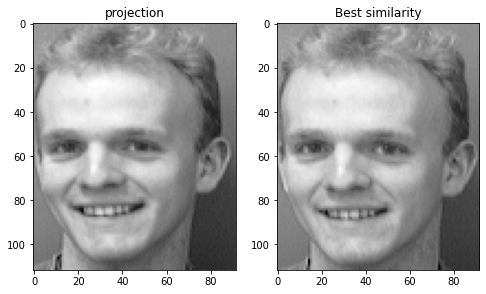

3


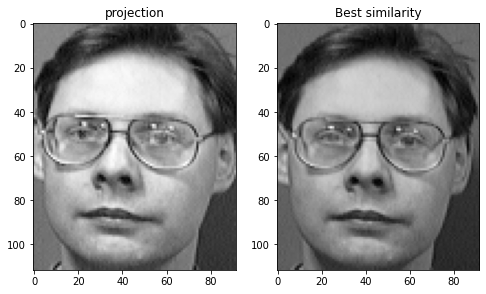

4


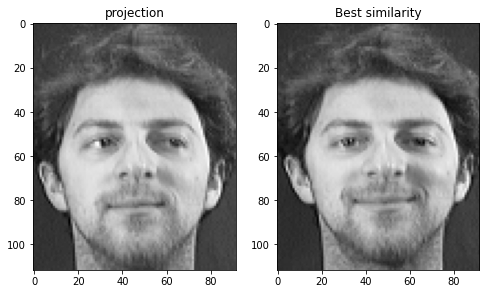

5


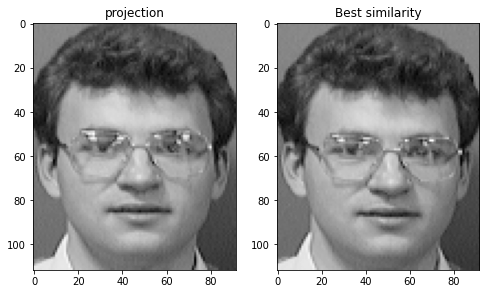

6


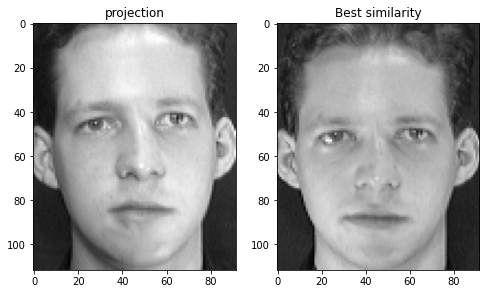

7


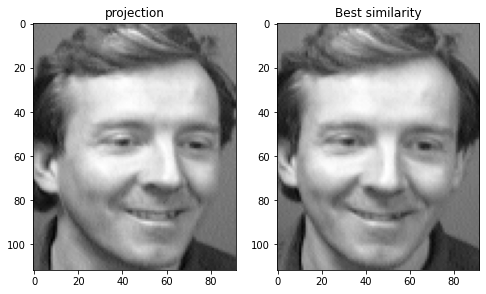

8


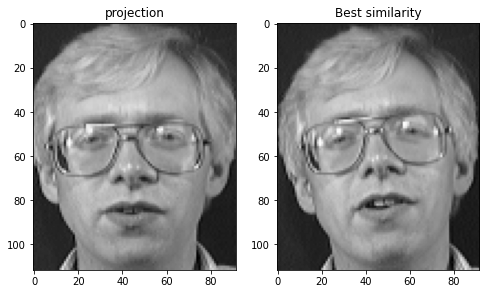

9


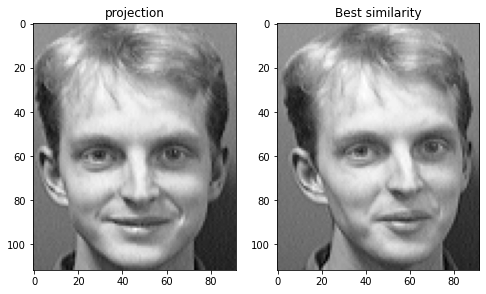

10


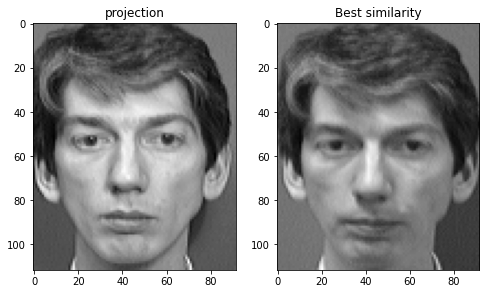

11


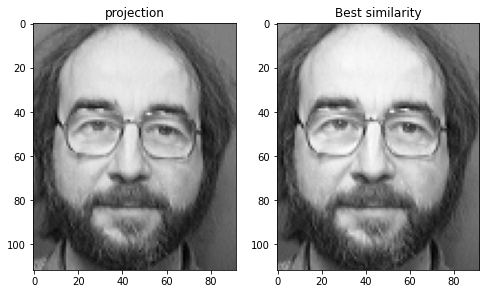

12


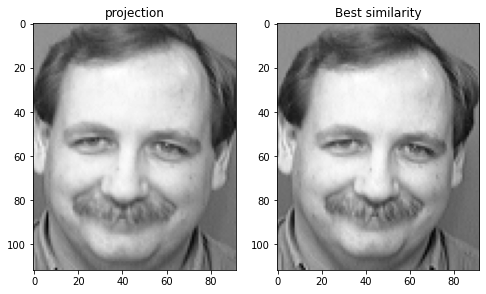

13


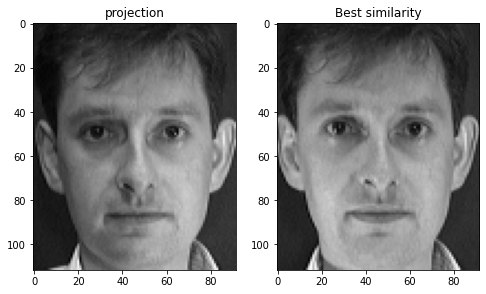

14


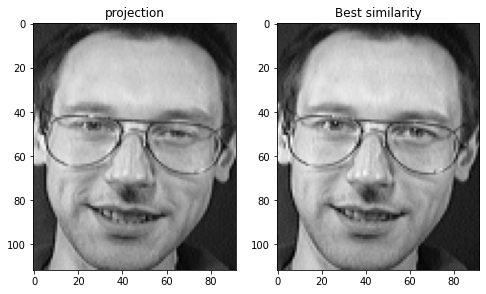

15


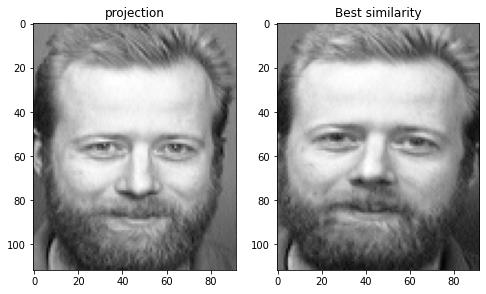

16


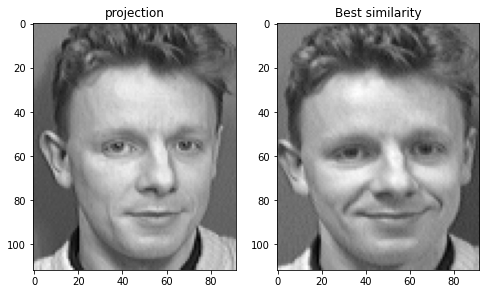

17


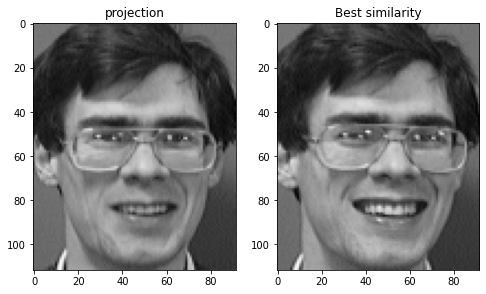

16


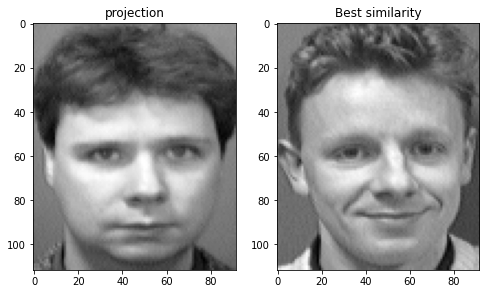

19


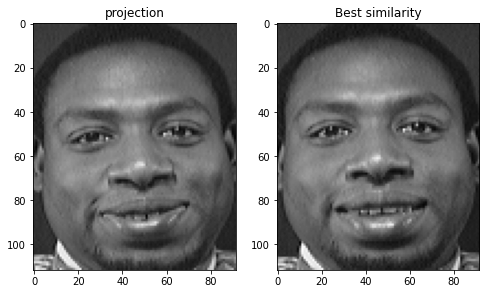

20


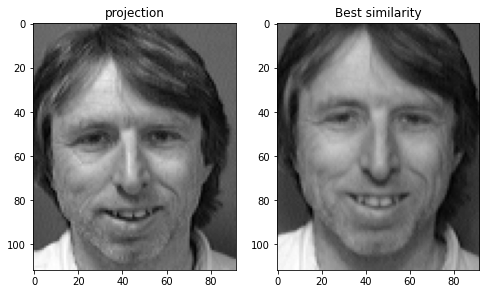

21


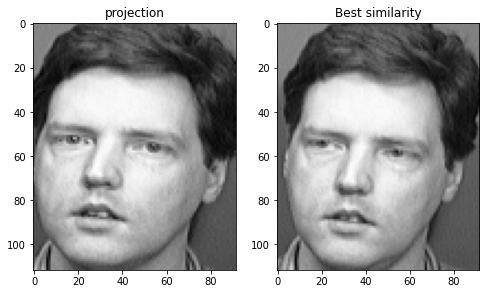

12


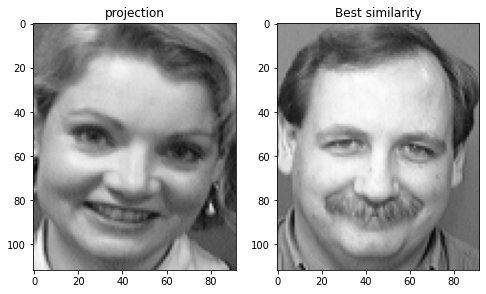

23


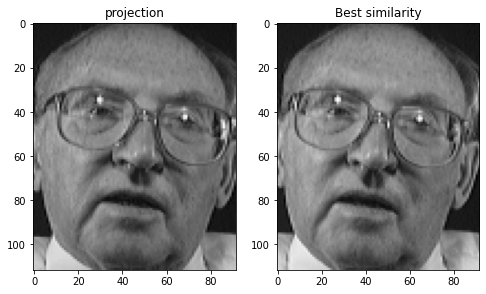

24


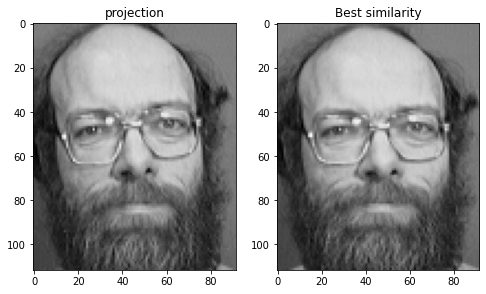

4


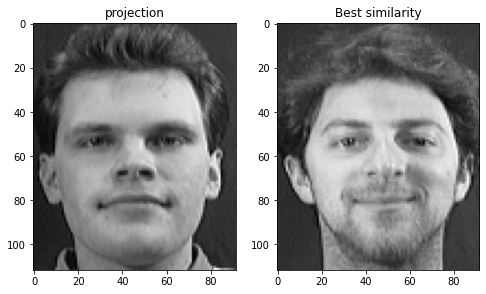

26


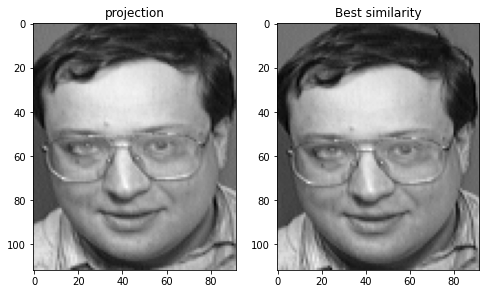

27


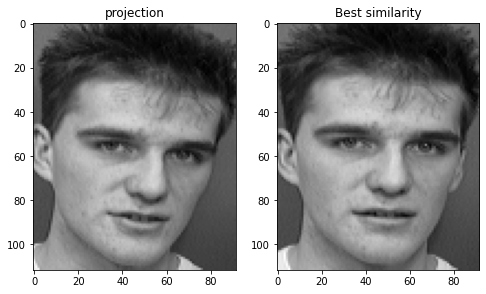

28


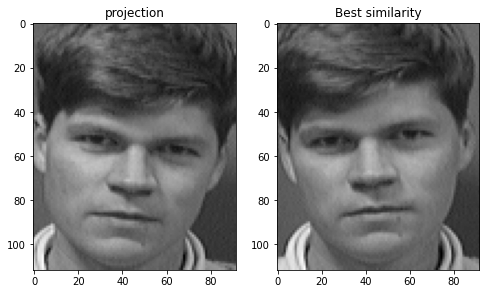

29


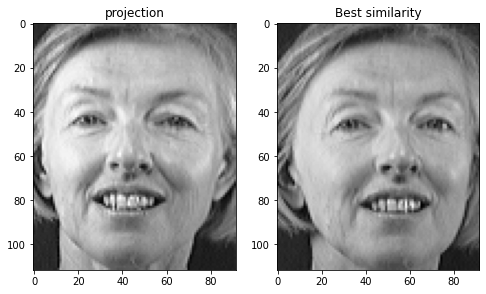

30


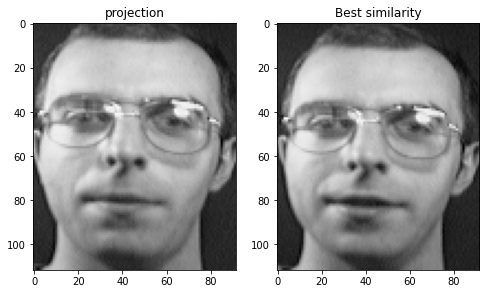

31


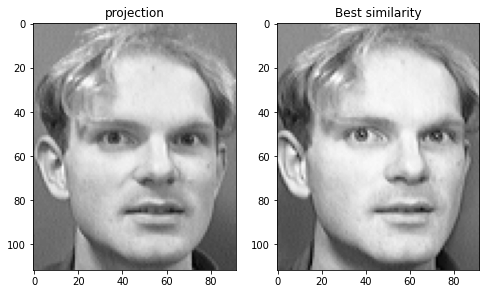

32


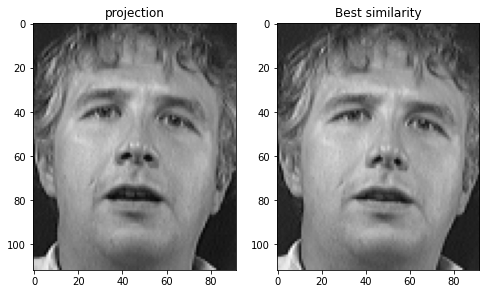

33


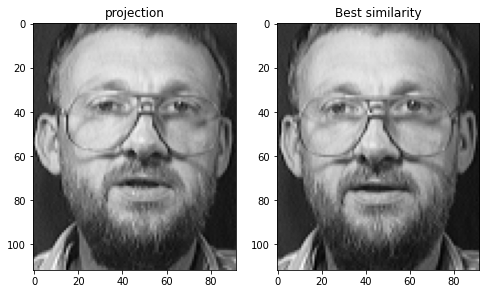

34


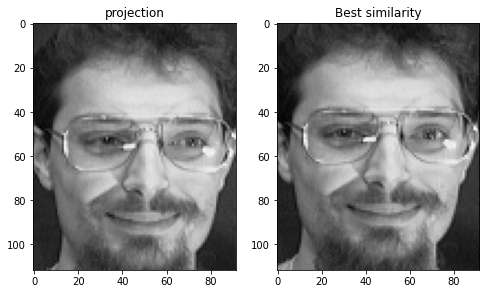

35


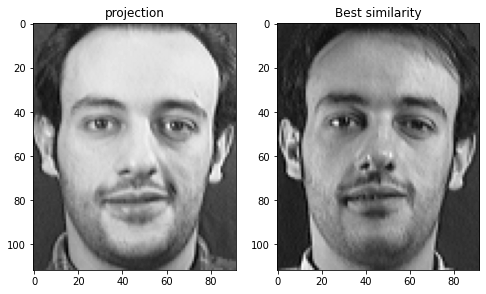

36


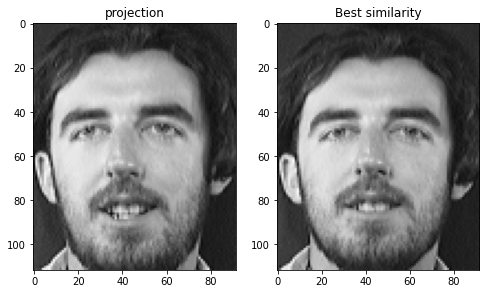

37


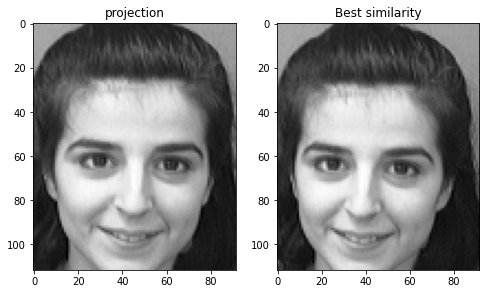

38


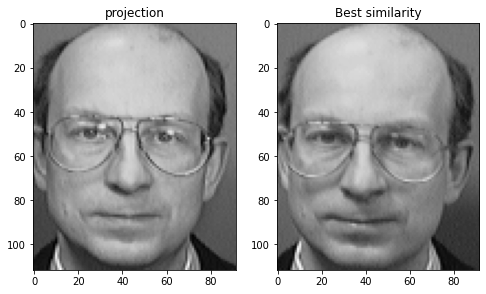

39


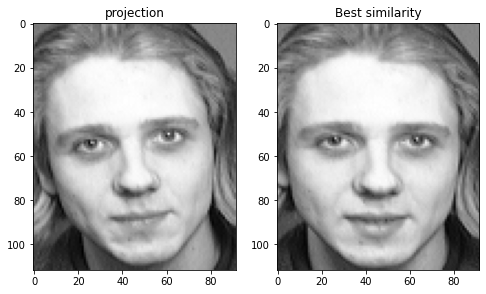

In [42]:
count = 1
for i in range(40): 
 projection = images_test[i].reshape(1,-1)
 projection_param = np.dot(eigen_faces, (projection - transformation.mean_).T)
 dist = np.linalg.norm(params - projection_param, axis=0)
 best = np.argmin(dist)
 print(best)
 if(best == i):
   count += 1
 fig, axes = plt.subplots(1,2,figsize=(8,6))
 axes[0].imshow(projection.reshape(face_shape), cmap="gray")
 axes[0].set_title("projection")
 axes[1].imshow(flatten_face_matrix[best].reshape(face_shape), cmap="gray")
 axes[1].set_title("Best similarity")
 plt.show() 

In [43]:
accuracy = (count/40)*100

In [44]:
accuracy

95.0